## Importing all the libraries

In [21]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns# type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import mean_absolute_error # type: ignore
from sklearn.metrics import mean_absolute_percentage_error # type: ignore  
from sklearn.metrics import mean_squared_error # type: ignore
from sklearn.metrics import r2_score # type: ignore

## Reading the CSV

In [22]:
df = pd.read_csv(r"auto-mpg.csv")

## EDA

In [23]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [25]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## Checking for null values

In [26]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

## Graphs

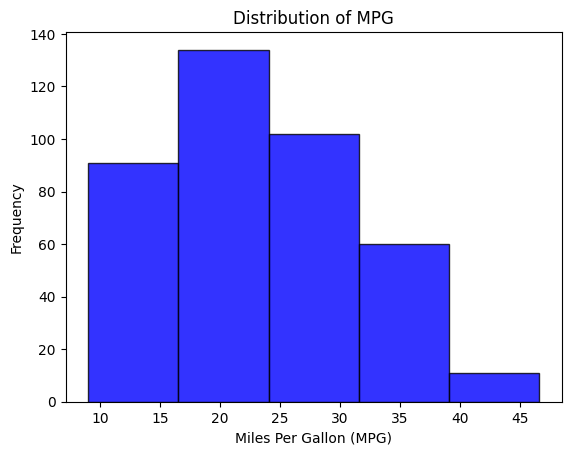

In [27]:
# Histogram
plt.hist(df['mpg'], bins=5, alpha=0.8, color='blue', edgecolor='black')
plt.title('Distribution of MPG')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Frequency')
plt.show()

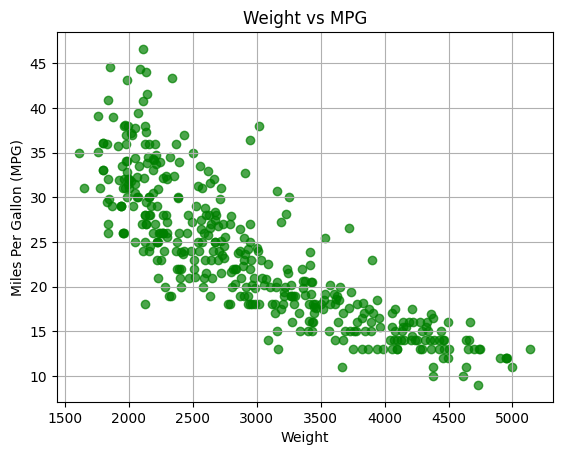

In [28]:
plt.scatter(df['weight'], df['mpg'], color='green', alpha=0.7)
plt.title('Weight vs MPG')
plt.xlabel('Weight')
plt.ylabel('Miles Per Gallon (MPG)')
plt.grid(True)
plt.show()


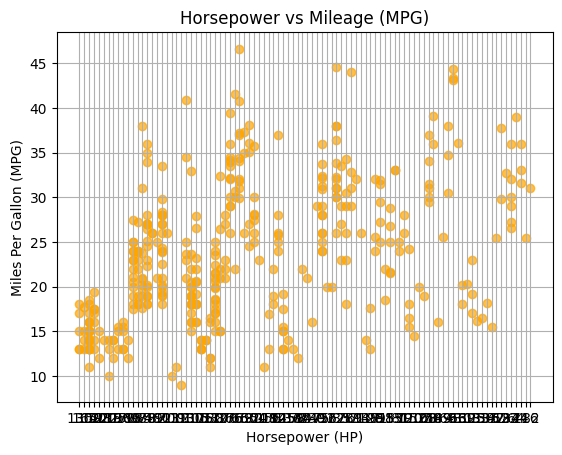

In [29]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(df['horsepower'], df['mpg'], color='orange', alpha=0.7)

# Add labels and title
plt.title('Horsepower vs Mileage (MPG)')
plt.xlabel('Horsepower (HP)')
plt.ylabel('Miles Per Gallon (MPG)')
plt.grid(True)

# Show the plot
plt.show()


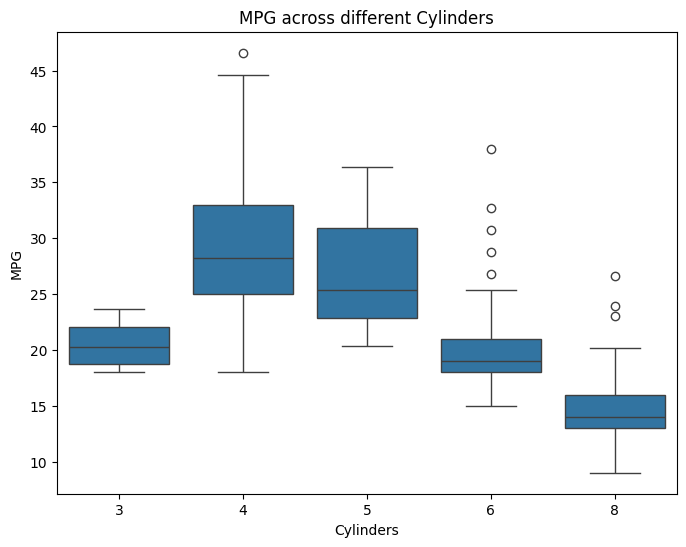

In [30]:
# Boxplot for 'mpg' across different 'cylinders'
plt.figure(figsize=(8, 6))
sns.boxplot(x='cylinders', y='mpg', data=df)
plt.title('MPG across different Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.show()

## Checking all the unique values

In [31]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

### Since there is a value as "?" we need to handle it

In [32]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())  # Filling with mean
df['horsepower'] = df['horsepower'].astype(int)

## Define features and target

In [33]:

X = df[['horsepower', 'weight', 'cylinders']]  # Independent variables
y = df['mpg']  # Dependent variable

## Train-test split

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 3 to 102
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   horsepower  318 non-null    int64
 1   weight      318 non-null    int64
 2   cylinders   318 non-null    int64
dtypes: int64(3)
memory usage: 9.9 KB


## Initialize and fit the model


In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

# Display coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [-0.04200823 -0.0055421  -0.38424958]
Model Intercept: 46.4888075862964


## Make predictions on the test set

In [37]:
y_pred = model.predict(X_test)

## Evaluating the Model

In [38]:
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)
print('Mean Absolute Error = ', mae)
print('Mean Absolute Percentage Error = ', mape)
print('Mean Squared Error = ', mse)
# print('Root Mean Squared Error = ', rmse)
print('R2 Square = ', r_squared)

Mean Absolute Error =  3.104054179560218
Mean Absolute Percentage Error =  0.14277970747073176
Mean Squared Error =  14.498733635097096
R2 Square =  0.7303386159867213


## Checking the line of regression

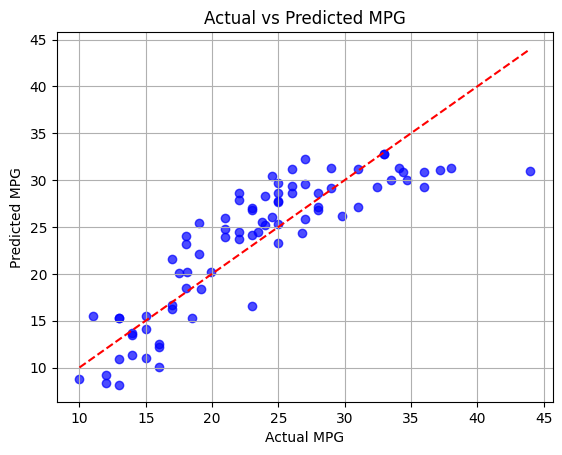

In [39]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Perfect prediction line
plt.title('Actual vs Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.grid(True)
plt.show()


Text(0, 0.5, 'Predicted')

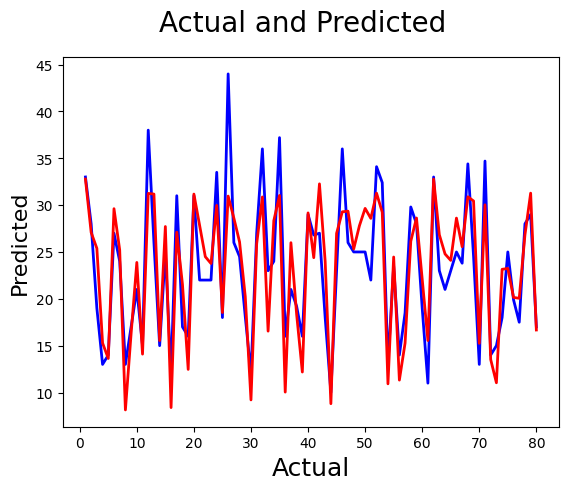

In [40]:
# Actual vs Predicted

c = [i for i in range(1,len(y_test)+1,1)]         
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Actual', fontsize=18)                              
plt.ylabel('Predicted', fontsize=16)    

## Predicting on our own data

In [41]:
model.predict([[110,2720,3]])

c:\Users\abhij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.64064629])